# Gradiente de la funcion de costo de regresion logistica.
De la clase anterior:
$$J(\theta) =-\frac1m \sum_{i=1}^m  y_i \log h(
\theta, x^{(i)}) + (1 - y_i) \log (1 - h(\theta, x^{(i)}))  \tag{1} . $$




Queremos hallar $d J(\theta)/d \theta$. Vamos a tomar solo un termino de la suma (y luego sumamos).
$ h(\theta, x^{(i)}) = S( x^{(i)} \theta)$.


$$ \frac{\partial y_i \log [ h(\theta, x^{(i)})] }{\partial \theta_k} = y_i \frac{1}{S} S' x_{ik} = y_i \frac{1}{S} S (1 - S) x_{ik} = y_i (1 - S) x_{ik} .$$

Hacemos lo mismo con el segundo termino.

$$ \frac{\partial (1-y_i) \log [ 1 -  h(\theta, x^{(i)})] }{\partial \theta_k} = -(1-y_i) \frac{1}{1 -S} S' x_{ik} = (y_i - 1) \frac{1}{1 - S} S (1-S) x_{ik} = (y_i -1) S x_{ik}   .$$

Sumamos ambas

\begin{eqnarray}
\frac{\partial y_i \log [ h(\theta, x^{(i)})] }{\partial \theta_k} + \frac{\partial (1-y_i) \log [ 1 -  h(\theta, x^{(i)})] }{\partial \theta_k}  
&=& y_i x_{ik} - y_i S x_{ik} + y_i S x_{ik} - S x_{ik} \\
&=& y_i x_{ik} - S x_{ik} \\
&=& (y_i - S) x_{ik} \\
&=& -( h(x^{(i)}, \theta) - y_i) x_{ik}.
\end{eqnarray}
Metemos todos estos terminos en la suma (1)

$$\frac{\partial J(\theta)}{\partial \theta_k} = \frac1m \sum_{i=1}^m ( h(\theta, x^{(i)}) - y_i) x_{ik} .$$



## Decision boundary: Frontera de decision.
Recuerde que la hipotesis se definio como


$$h(\theta, x^{(i)}) = S( x^{(i)} \theta) = \frac{1}{1 + \mathrm{e}^{- x^{(i)} \theta}} .$$
Esta funcion se comporta como una probabilidad. Esta en el intervalo $(0,1)$. Se comporta como

$$p( y=1 | x^{(i)}, \theta) .$$
Sin embargo queremos usar este modelo para problemas binarios.
Entonces mas bien particularizamos la hipotesis a un caso binario como sigue.



\begin{eqnarray}
h_{binario} =  \left \{
    \begin{array}{cc}
    1  & \text{ si } S(x^{(i)} \theta) > 0.5 \\
    0 & \text{ de lo contrario }
    \end{array}
    \right .
\end{eqnarray}
Que pasa cuando $S( x^{(i)} \theta) = 0.5$. En este caso
el argumento $x^{(i)} \theta = 0$.



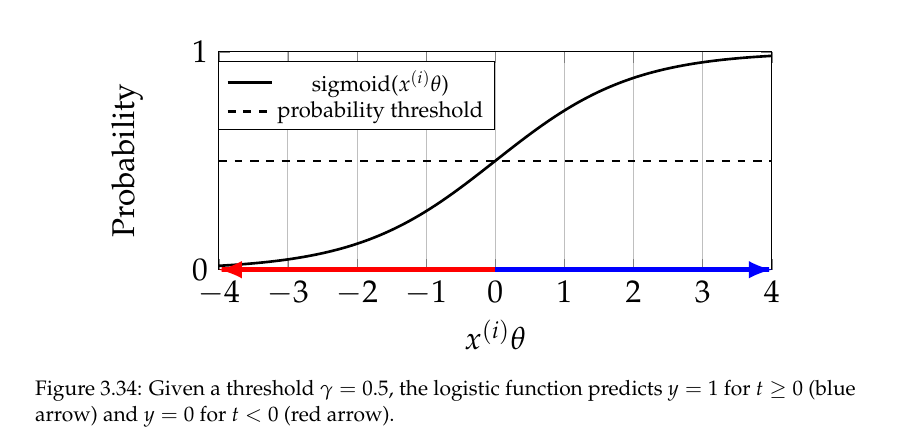

El limite entre "los buenos" y "los malos" ocurre en $x^{(i)} \theta = 0$. Que para vectores en $\mathbb{R}^n$ es un hiperplano.  

Particularmente pensemos en $\mathbb{R}^2$. Entonces
$$ x^{(i)} \theta = \theta_0 + x \theta_1 .$$
Es una recta con intercepto en $\theta_0$ y pendiente  $\theta_1$.




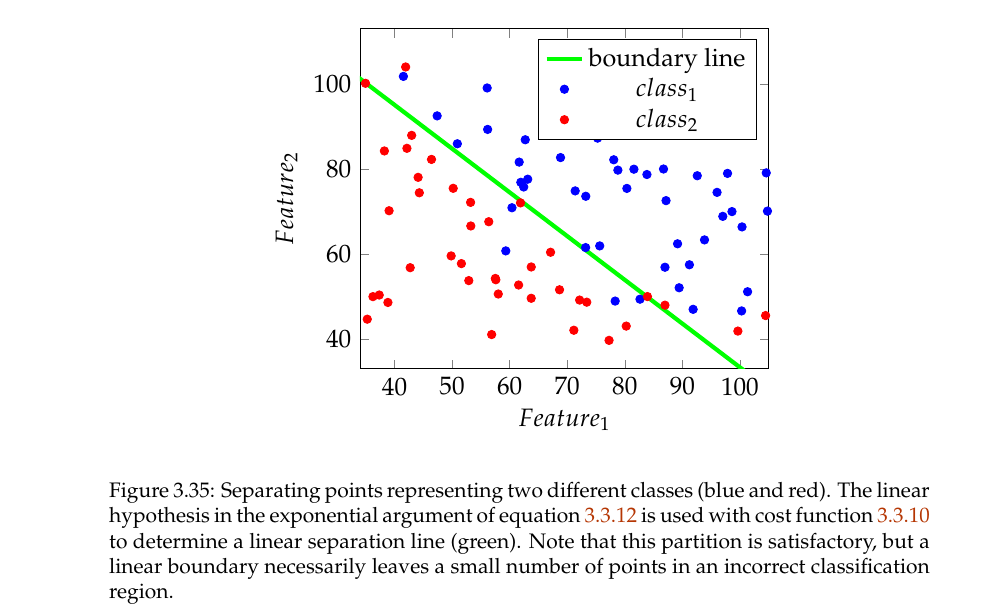

Tiene que ser la frontera de decision plana? No.

Podemos pensar en una hipotesis mas general.


$$h(\theta, X) = S( g(\theta, X)) .$$
El argumento de la funcion sigmoid $S$ es en esta caso otra
funcion $g(\theta, X)$ (mas general.

Vamos a ver el caso donde $g$ es un polinomio de orden 8 en dos variables.

En este caso:

$$g(\theta, X) = \sum_{i=0}^8 \sum_{j=0}^i \theta_{[i(i+1)/2 + j]} x_2^j x_1^{i-j} .$$

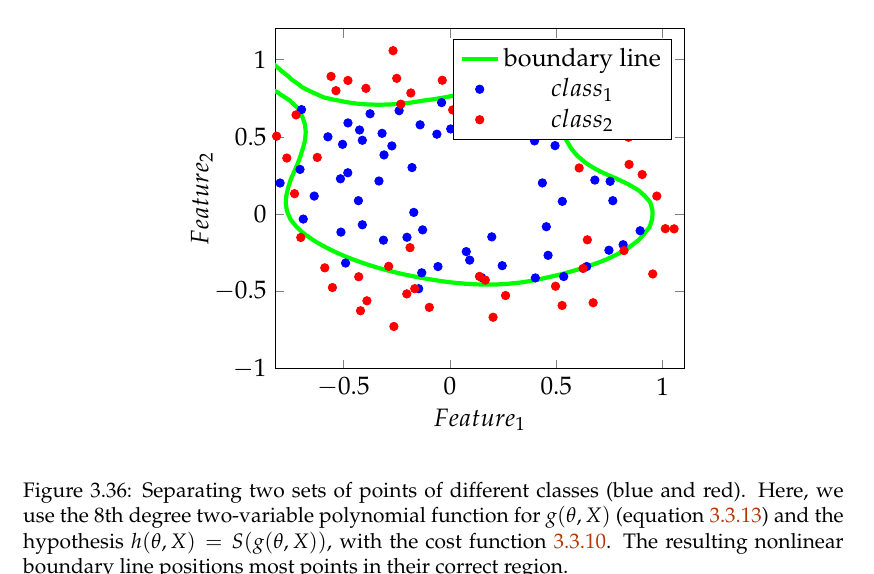

La linea verde en la grafica de arriba es $g(\theta, x)=0$
donde $\theta$ lo produce (aprende) el algoritmo  y $(x_1, x_2)$
(que en la grafica es $Feature_1$ y $Feature_2$, son las variables
del problema. $g(\theta,x)=0$ es una curva implicita.

Podriamos pensar que la figura de arriba (anterior) presenta problemas de "overfitting" , sobre todo por la forma de la curva en la parte posterior izquierda. Recordemos que una forma de prevenir el sobreajuste es mediante regularizacion.

## Regularizacion sobre la funcion logistica.

$$J(\theta) =-\frac1m \sum_{i=1}^m  y_i \log h(
\theta, x^{(i)}) + (1 - y_i) \log (1 - h(\theta, x^{(i)}))  +
\frac{\lambda}{2 m} \| \theta \|^2.$$

En el ejercicio para la semana entrante tambien incluimos esta parte. La siguiente figura muestra el mismo problema cuando se
hace regularizacion (creo que con $\lambda = 1$).

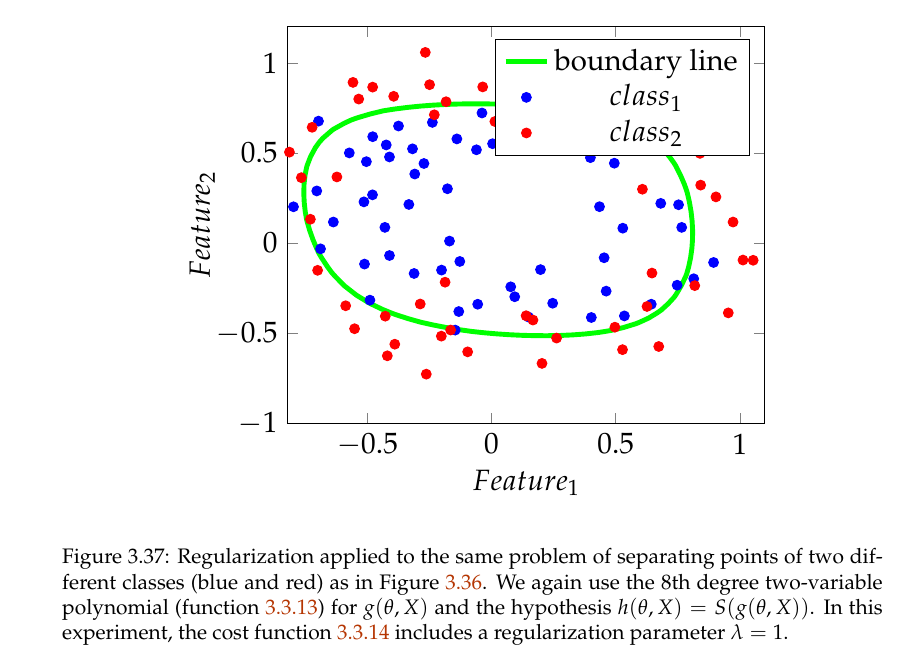

## Clasificacion multiclase.
La pregunta es que pasa si en vez ser binario, nuestro sistema tiene mas de dos clases. Piense en clasificaion entre perros, gatos y cerdos.

Como hacemos para multiclase? Vamos a presentar 3 metodos.

* Regresion Softmax : En este caso, en vez de la funcion sigmoid logistica $S(t)$.

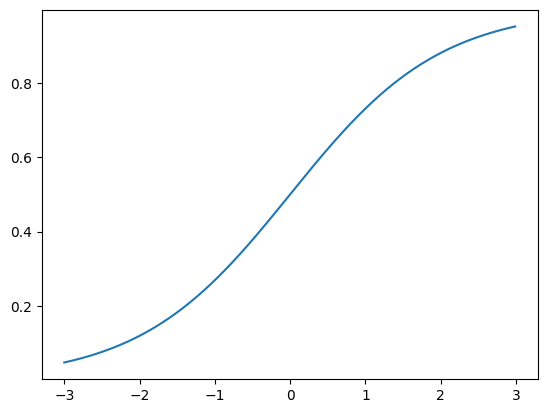

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def s(t) :
    return 1/ (1 + np.exp(-t))

dom = np.arange(-3,3,0.01)

plt.plot(dom, s(dom))

La softmax es una generalizacion de la sigmoid a $K$ clases.
Aca la definicion:


\begin{eqnarray}
\sigma : \mathbb{R}^{K} &\to& [0,1]^K \\
(z_i) &\mapsto& \sigma(z_i)  = \frac{\exp( z_i)}{\sum_{j=1}^K \exp(z_i)}
\end{eqnarray}

La hipotesis se construye con el softmax.


\begin{eqnarray}
h(\theta, x) =
\begin{pmatrix}
P(y=1  | x; \theta) \\
P(y=2  | x; \theta) \\
\vdots \\
P(y=K  | x; \theta) \\
\end{pmatrix}
= \begin{pmatrix}
\sigma(z_1) \\
\sigma(z_2) \\
\vdots \\
\sigma(z_K) \\
\end{pmatrix}
= \frac{1}{\sum_{j=1}^K \exp(z_i)}
\begin{pmatrix}
\exp( {\theta^{(1)}}^T x) \\
\exp( {\theta^{(2)}}^T x) \\
\vdots \\
\exp( {\theta^{(k)}}^T x) \\
\end{pmatrix} \tag{2}
\end{eqnarray}

Debemos construir la nueva funcion de costo para el caso **mutliclase**. Los pasos para esto son los mismos que hicimos para la funcion de costo, caso binario (clase anterior).

* Escribir la funcion de probabilidad multiclase para cada muestra (ecuacion (2)).

* Escribir la verosimilitud (likelihood) como una productoria doble, sobre las muestras y sobre las clases.

* Tomar el logaritmo que convierte la productoria doble en una suma doble.

* Cambiar el signo para la funcion tenga minimo y no maximo.

El resultado (se deja tarea al estudiante) es

$$ J(\theta) = - \left [ \sum_{i=1}^m \sum_{k=1}^K \mathbb{1} \{ y^{i)} = k \}  \log \frac{\exp (\theta^{(k)} x)}{\sum_{j=1}^K \exp ( \theta^{(j)} x)} \right ]  .$$
Esta es la funcion de costo para el metodo de superclase.
Donde $\mathbb{1}$ esta definido como


\begin{eqnarray}
\mathbb{1} =  \left \{
    \begin{array}{cc}
    1  & \text{ si } x  \text{ es verdad} \\
    0  & \text{ si } x  \text{ es mentira}
    \end{array}
    \right .
\end{eqnarray}

`



El gradiente de esta funcion es:


$$ \nabla J(\theta) = -\sum_{i=1}^m [ x^{(i)} \left ( \mathbb{1}\{ y^{(i)} = k \}  - p( y^{(i)} = k | x^{(i)}, \theta) \right ).$$

* **One-hot encoding**: Este es otro metodo que se puede usar para multiclase.  Piense en tres clases, perro, gato y cerdo. Y los siguientes vectores

\begin{eqnarray}
y^{(1)} = (1, 0, 0 ) \quad \text{para gato} \\
y^{(2)} = (0, 1, 0 ) \quad \text{para perro} \\
y^{(3)} = (0, 0, 1 ) \quad \text{para cerdo} \\
\end{eqnarray}

El problema se vuelve matricial para $Y$.
Tenemos

$$X \Theta = Y \quad , X \in \mathbb{R}^{m \times n} \quad , \Theta \in \mathbb{R}^{n \times 3} , \quad Y \in \mathbb{R}^{m \times 3}  .$$
Por columnas podemos pensar en problemas

$$X \Theta_i = Y_i  \quad , i = 1, \cdots, k .$$

## Proxima clase **uno versus el resto**.
Popularmente le dicen uno contra todos. En ingles
One-vs-all. Debe ser One-vs-rest.

